<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/TitanicNN_CLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np

In [102]:
df = pd.read_csv('/content/sample_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
df.shape

(891, 12)

In [104]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [105]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [106]:
age_mean = df['Age'].mean()

In [107]:
df['Age'] = df['Age'].fillna(age_mean)

In [108]:
df = df.dropna()

In [109]:
df.shape

(889, 9)

In [110]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [111]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [112]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='male' else 0)

<ipython-input-112-079203183c5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='male' else 0)


In [113]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [114]:
df = pd.get_dummies(df)

In [115]:
df = df.drop('PassengerId', axis=1)

In [116]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [117]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
X.shape

(889, 9)

In [121]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[X.shape[1]]),
    layers.Dense(7, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(7, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

In [123]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [124]:
es = EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True
)

In [125]:
hist = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000,
    callbacks=[es],
    verbose=0
)

In [126]:
h_df = pd.DataFrame(hist.history)
h_df.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.907970,0.461322,1.007235,0.561798
1,0.938969,0.428973,0.837631,0.573034
2,0.893574,0.440225,0.774593,0.573034
3,0.862440,0.445851,0.742082,0.573034
4,0.883586,0.454290,0.722057,0.584270


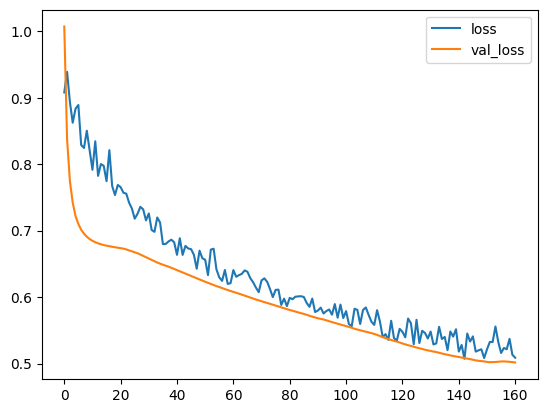

In [127]:
h_df[['loss', 'val_loss']].plot();

In [128]:
h_df['val_binary_accuracy'].max()

0.7977527976036072